1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumption in miles per gallon,
    to be predicted in terms of 3 multivalued discrete and 5 continuous
    attributes." (Quinlan, 1993)

5. Number of Instances: 398

6. Number of Attributes: 9 including the class attribute

7. Attribute Information:

    1. mpg:           continuous
    2. cylinders:     multi-valued discrete
    3. displacement:  continuous
    4. horsepower:    continuous
    5. weight:        continuous
    6. acceleration:  continuous
    7. model year:    multi-valued discrete
    8. origin:        multi-valued discrete
    9. car name:      string (unique for each instance)

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sb
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from collections import OrderedDict
from operator import itemgetter
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.stats import randint as sp_randint

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
columns = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"]

auto = pd.read_table('auto-mpg.data', delim_whitespace=True, names = columns)

In [4]:
auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [5]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
auto.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model year      False
origin          False
car name        False
dtype: bool

There are no null values. I now explore the data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x110b4fd90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1143f8550>]], dtype=object)

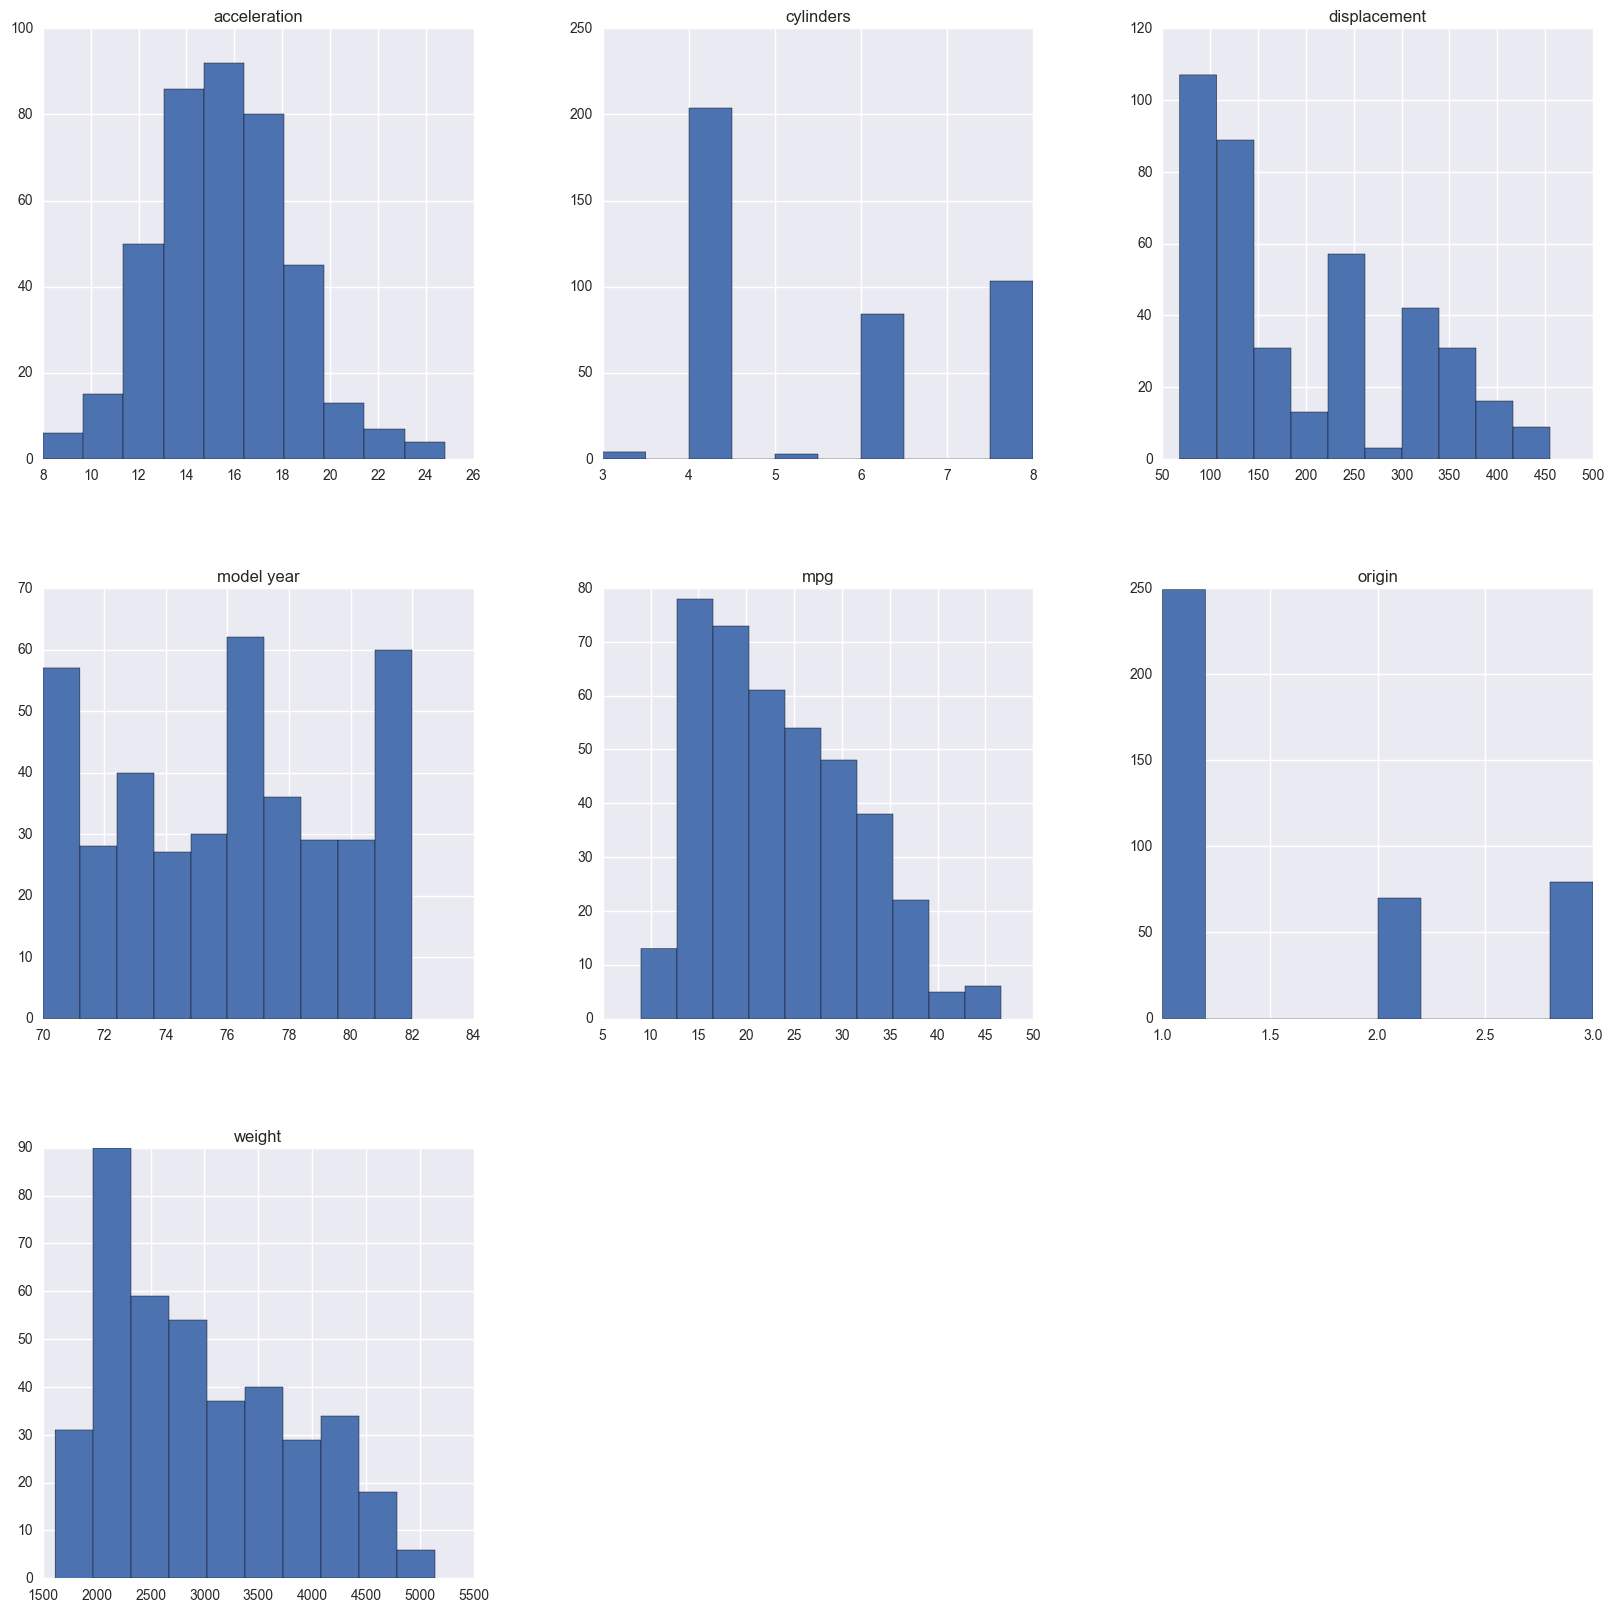

In [7]:
auto.hist(figsize = (20,20))

Based on these I decided to make scatter plots of mpg against weight and accelaration.

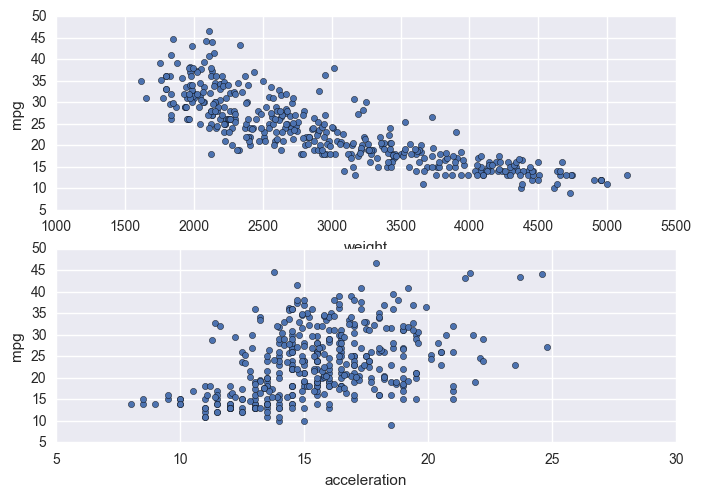

In [8]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
auto.plot("weight", "mpg", kind='scatter', ax=ax1)
auto.plot("acceleration", "mpg", kind='scatter', ax=ax2)
plt.show()

The scatter plots hint that there's a strong negative linear relationship between the weight and mpg columns and a weak, positive linear relationship between the acceleration and mpg columns. 

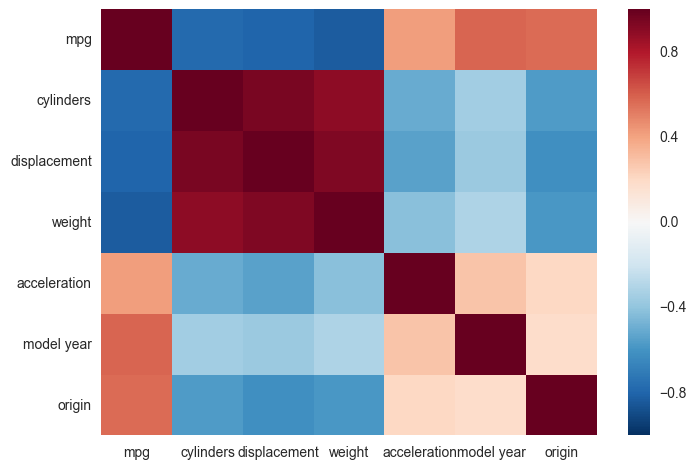

In [9]:
corr = auto.corr()
sb.heatmap(corr, xticklabels=corr.columns,
        yticklabels=corr.columns) 

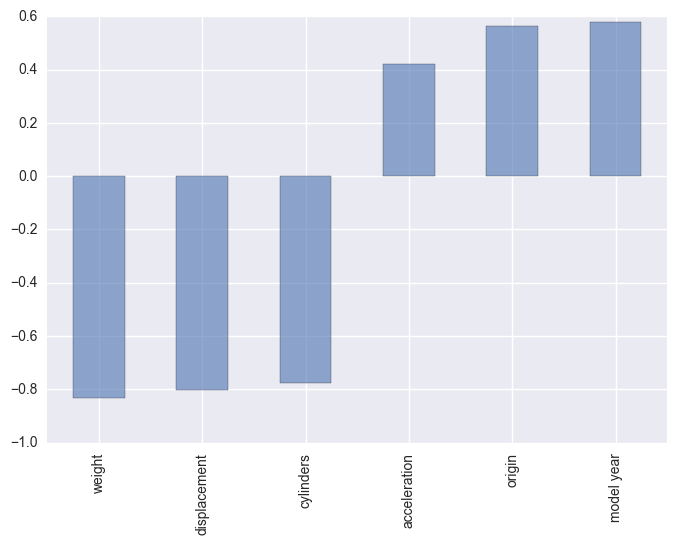

In [10]:
# Correlation to 'mpg'
cor = auto.corr()['mpg'].copy()
cor = cor.drop('mpg')
cor.sort_values(inplace=True)
cor.plot(kind='bar', alpha=0.6)

In [11]:
co = auto.corr()
co = co["mpg"] # how features are corelated to 'auto' 
co = co.sort_values()
co = co.drop('mpg')
print(co)

weight         -0.831741
displacement   -0.804203
cylinders      -0.775396
acceleration    0.420289
origin          0.563450
model year      0.579267
Name: mpg, dtype: float64


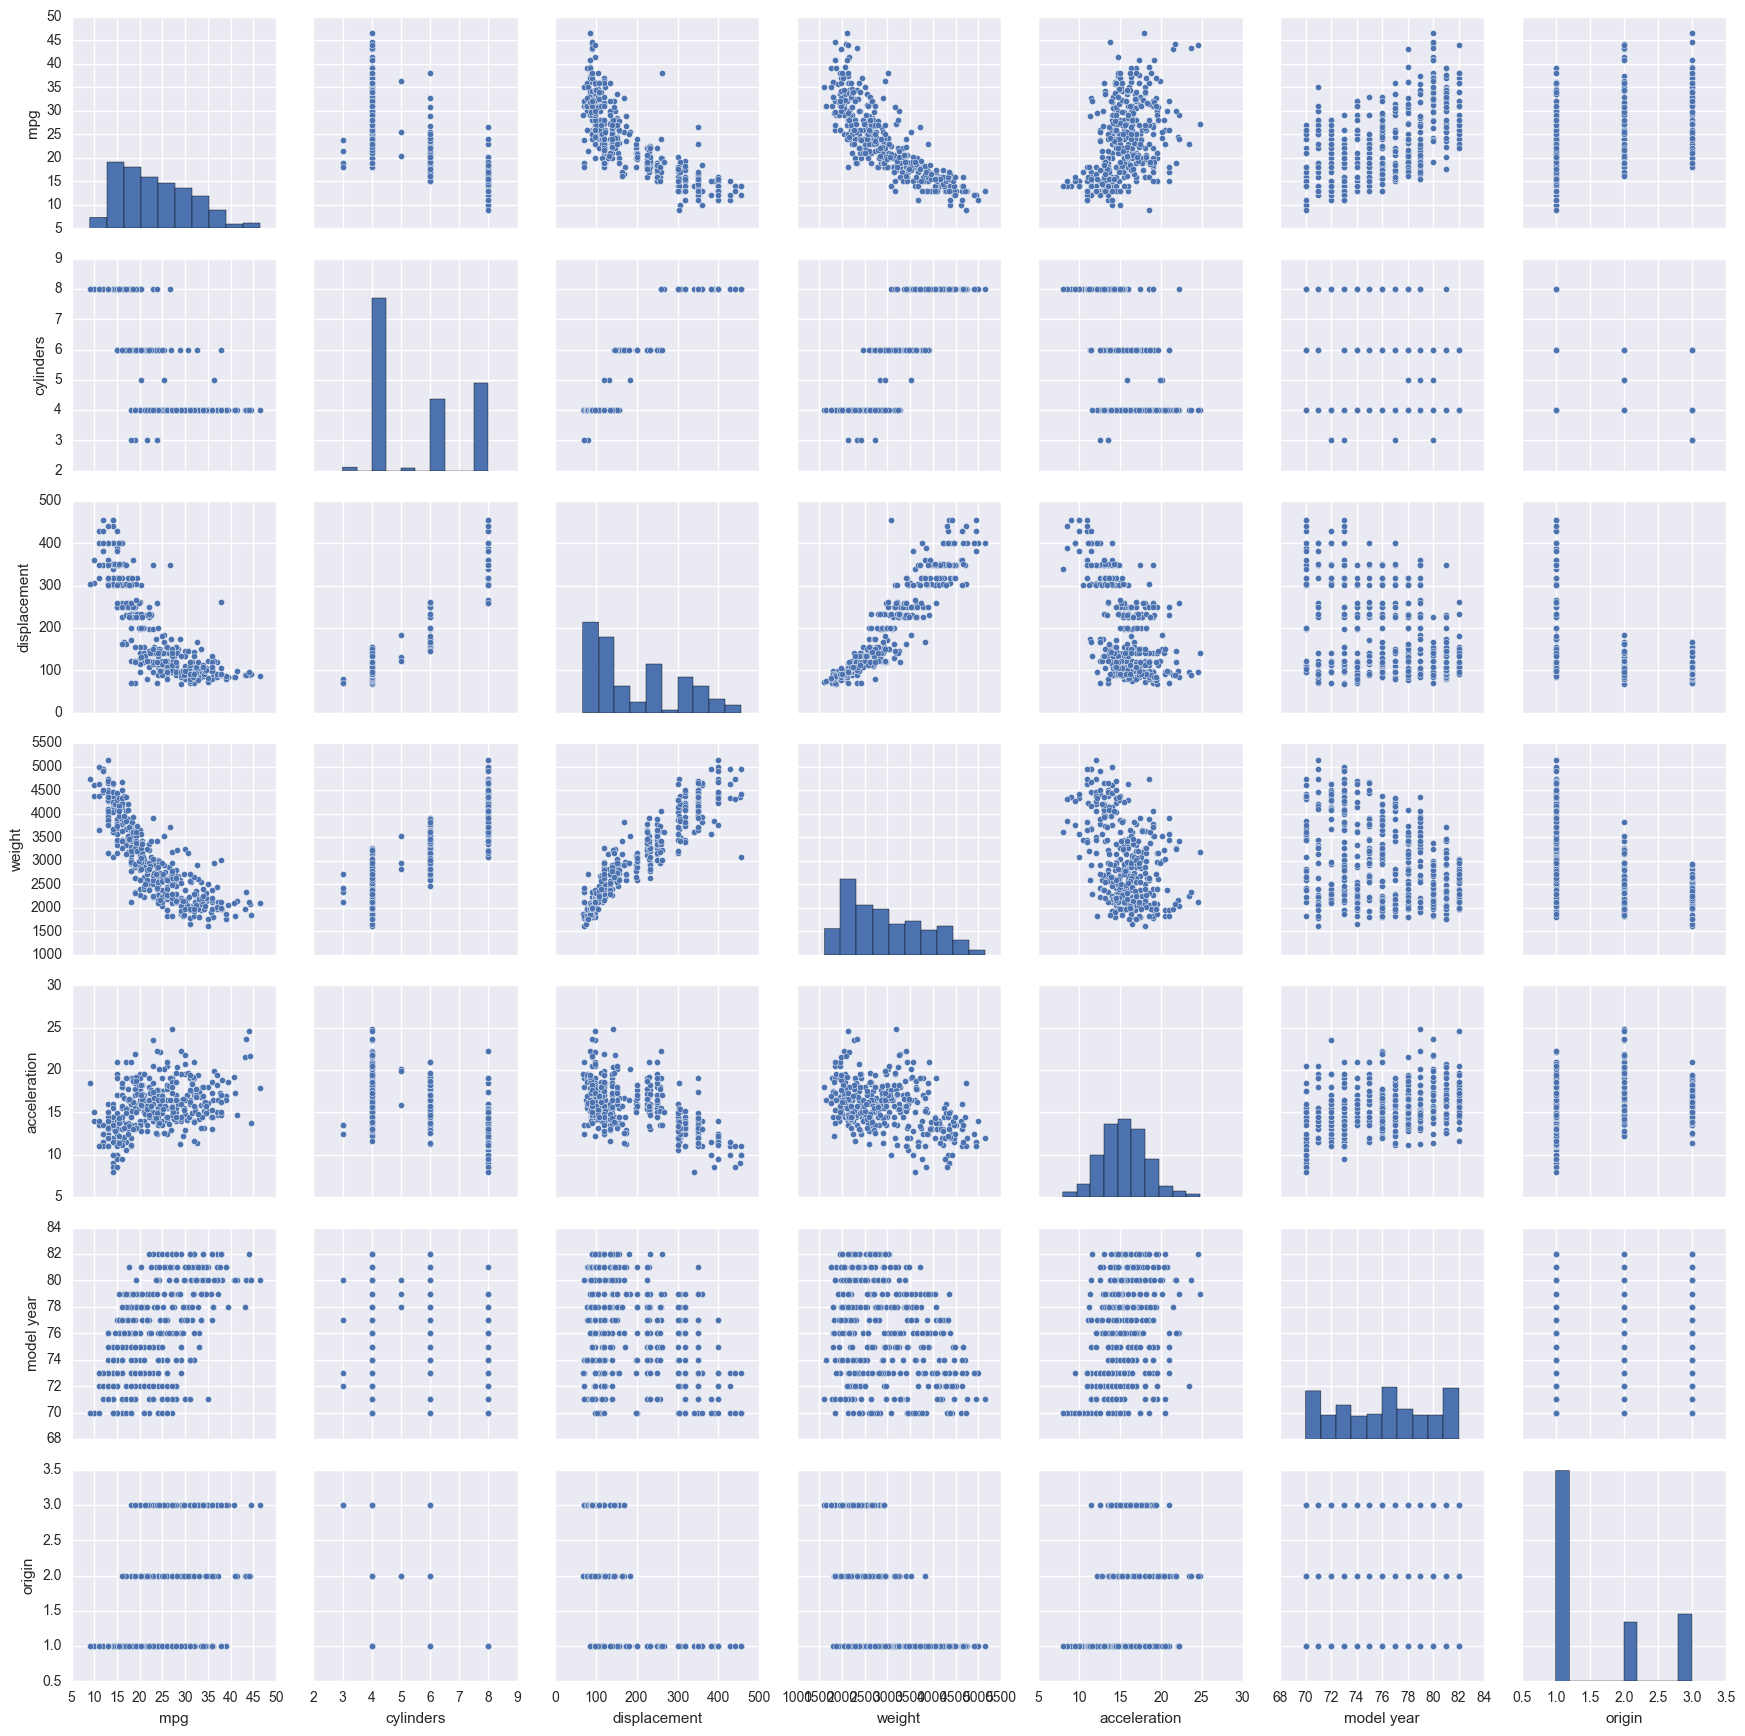

In [12]:
sb.pairplot(auto)
plt.show()

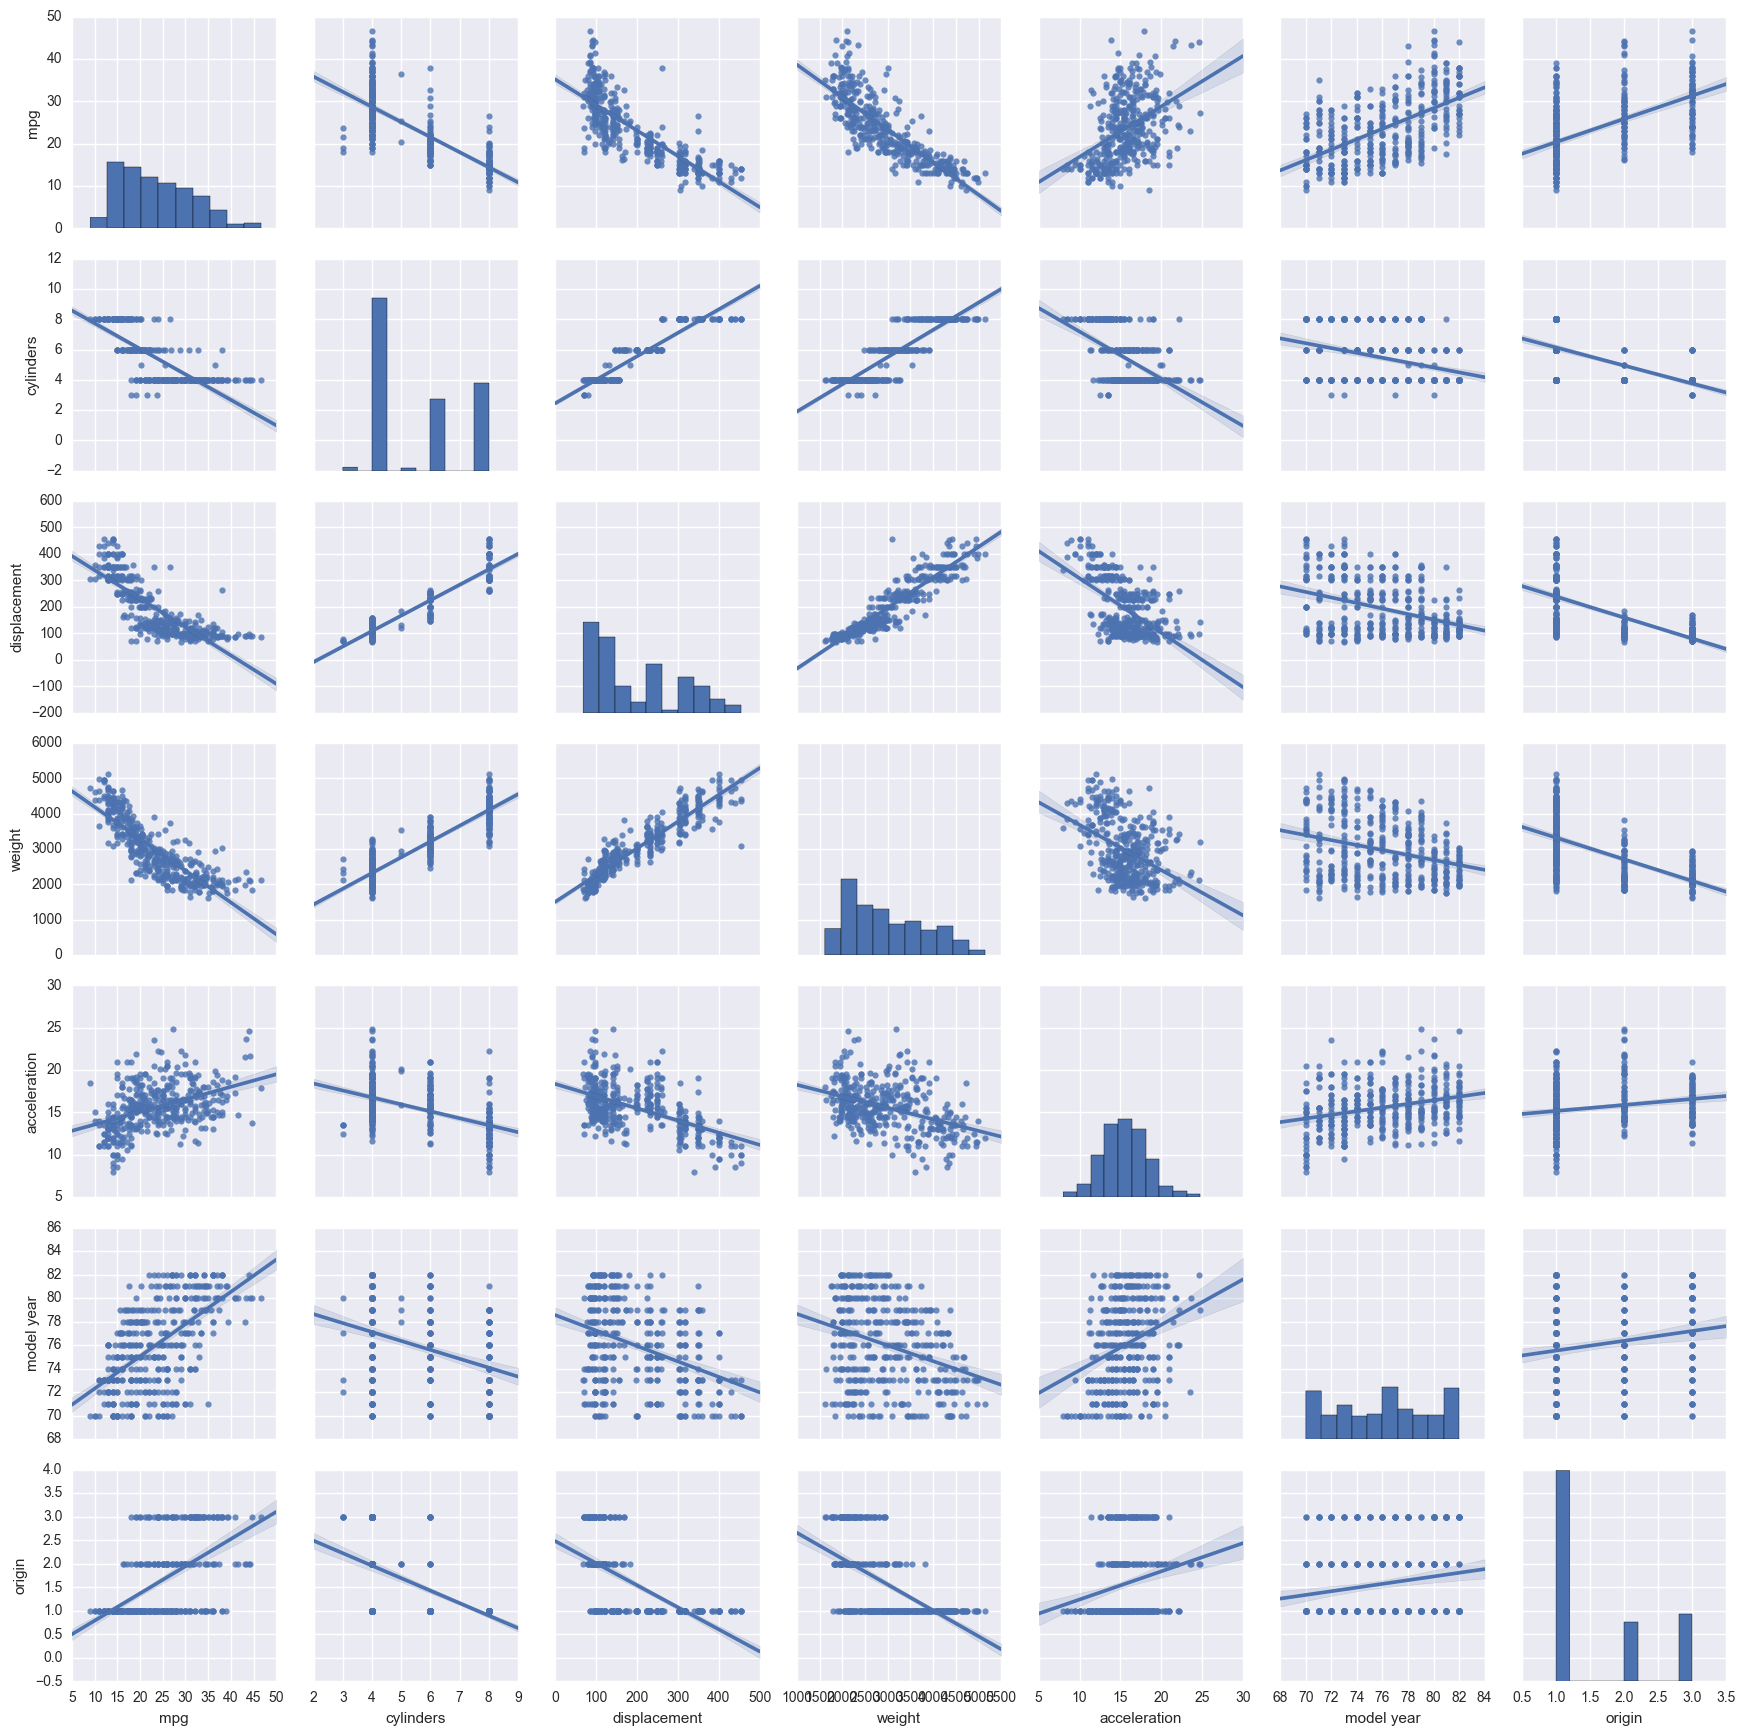

In [13]:
sb.pairplot(auto, kind="reg")
plt.show()

In [14]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(auto[['weight']], auto['mpg'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
predictions = lr.predict(auto[['weight']])
predictions[0:5]

array([ 19.41852276,  17.96764345,  19.94053224,  19.96356207,  19.84073631])

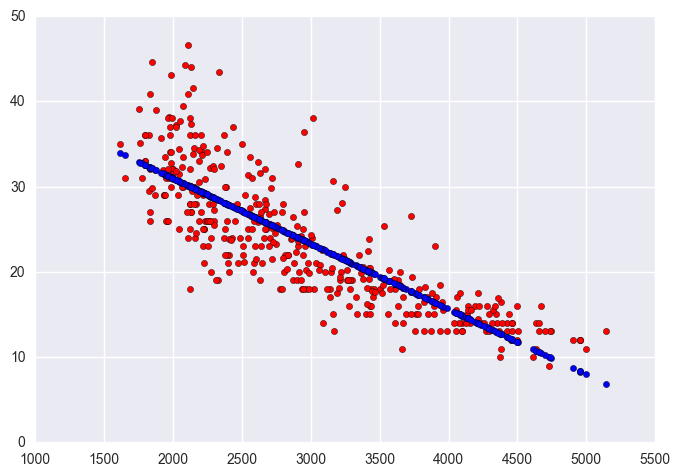

In [16]:
#Plotting the predictions
plt.scatter(auto['weight'], auto['mpg'], c='red')
plt.scatter(auto['weight'], predictions, c = 'blue')
plt.show()

In [17]:
#Error Metrics for weight as parameter to predict efficiency
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(auto['mpg'],predictions)
print(mse)
rmse = sqrt(mse)
print(rmse)

18.7809397346
4.33369815915


In [18]:
#There is some missing data denoted by '?' . This needs to be dealt with
filtered_cars = auto[auto['horsepower'] != '?']
filtered_cars['horsepower'] = filtered_cars['horsepower'].astype(float)

/Applications/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [19]:
co = filtered_cars.corr()
co = co["mpg"] # how features are corelated to 'auto' 
co = co.sort_values()
co = co.drop('mpg')
print(co)

weight         -0.832244
displacement   -0.805127
horsepower     -0.778427
cylinders      -0.777618
acceleration    0.423329
origin          0.565209
model year      0.580541
Name: mpg, dtype: float64


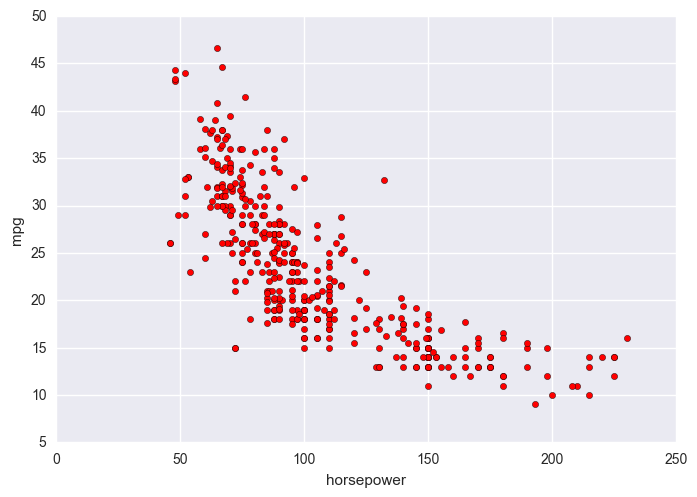

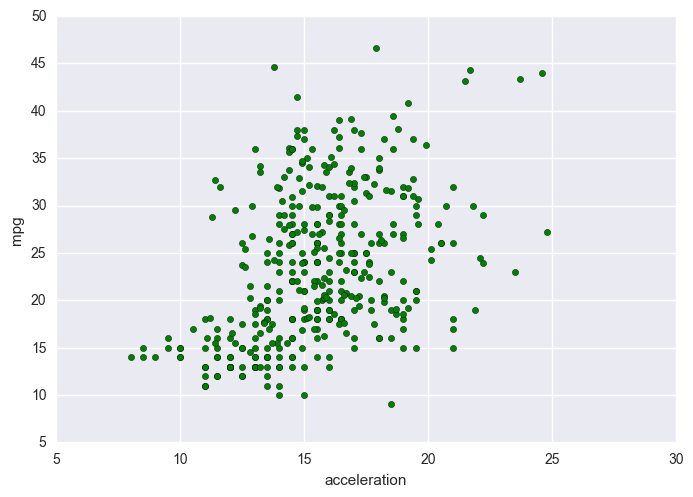

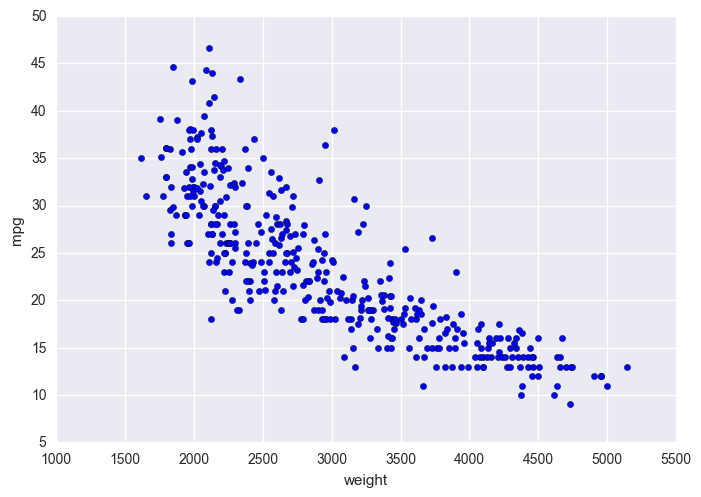

In [20]:
#EDA
filtered_cars.plot('horsepower', 'mpg', kind='scatter', c='red')
filtered_cars.plot('acceleration', 'mpg', kind='scatter', c='green')
filtered_cars.plot('weight', 'mpg', kind='scatter', c='blue')
plt.show()

In [21]:
#Fitting and predictions
lr.fit(filtered_cars[['horsepower']], filtered_cars['mpg'])
predictions = lr.predict(filtered_cars[['horsepower']])
print(predictions[0:5])
print(filtered_cars['mpg'].values)

[ 19.41604569  13.89148002  16.25915102  16.25915102  17.83759835]
[ 18.   15.   18.   16.   17.   15.   14.   14.   14.   15.   15.   14.
  15.   14.   24.   22.   18.   21.   27.   26.   25.   24.   25.   26.
  21.   10.   10.   11.    9.   27.   28.   25.   19.   16.   17.   19.
  18.   14.   14.   14.   14.   12.   13.   13.   18.   22.   19.   18.
  23.   28.   30.   30.   31.   35.   27.   26.   24.   25.   23.   20.
  21.   13.   14.   15.   14.   17.   11.   13.   12.   13.   19.   15.
  13.   13.   14.   18.   22.   21.   26.   22.   28.   23.   28.   27.
  13.   14.   13.   14.   15.   12.   13.   13.   14.   13.   12.   13.
  18.   16.   18.   18.   23.   26.   11.   12.   13.   12.   18.   20.
  21.   22.   18.   19.   21.   26.   15.   16.   29.   24.   20.   19.
  15.   24.   20.   11.   20.   19.   15.   31.   26.   32.   25.   16.
  16.   18.   16.   13.   14.   14.   14.   29.   26.   26.   31.   32.
  28.   24.   26.   24.   26.   31.   19.   18.   15.   15.   16.   1

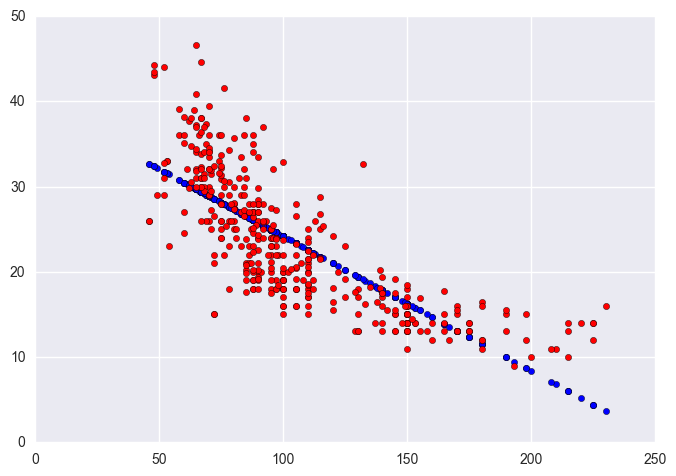

In [22]:

#Plot the predictions
plt.scatter(filtered_cars['horsepower'], predictions, c = 'blue')
plt.scatter(filtered_cars['horsepower'], filtered_cars['mpg'], c = 'red')
plt.show()

In [23]:
#Error metrics
mse = mean_squared_error(filtered_cars['mpg'], predictions)
rmse = sqrt(mse)
print(mse)
print(rmse)

23.9436629386
4.89322623007


When weight was used the mse and rmse were 18.78 and 4.33 respectively. The values when Horsepower is used are 23.94 and 4.89. Weight is a better parameter to use to predict fuel efficiency since the mse and rmse are lower.

In [25]:
features = ['weight','displacement','horsepower','cylinders', 'acceleration','origin','model year']

train, test = train_test_split(filtered_cars, test_size = 0.3)
print(train.shape)
print(test.shape)

(274, 9)
(118, 9)


In [26]:

train_X = train[features] 
train_y=train.mpg

test_X= test[features] 
test_y =test.mpg 

In [30]:
from sklearn.tree import DecisionTreeRegressor
model1=DecisionTreeRegressor(max_depth=2)
model1.fit(train_X,train_y)
predictions1=model1.predict(test_X)

featimp = pd.Series(model1.feature_importances_, index=features).sort_values(ascending=False)
print(featimp) 

cylinders       0.760262
horsepower      0.239738
model year      0.000000
origin          0.000000
acceleration    0.000000
displacement    0.000000
weight          0.000000
dtype: float64


In [82]:
from sklearn.metrics import accuracy_score
model2=LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=1)
model2.fit(train_X,train_y)
predictions2=model2.predict(test_X)

print(predictions2[0:5])
print model2.coef_
print model2.intercept_
print model2.score(train_X,train_y)
print model2.score(test_X,test_y)

[ 10.6219508   29.06345482  28.71836149  20.89508236  11.89527209]
[-0.0064345   0.01677191 -0.01758707 -0.25031798  0.14602726  1.50723556
  0.80977924]
-23.5423192607
0.805254837631
0.854493475767


In [41]:
# The coefficients
print('Coefficients: \n', model2.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % np.mean((model2.predict(test_X) - test_y) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % model2.score(test_X, test_y))



('Coefficients: \n', array([-0.0064345 ,  0.01677191, -0.01758707, -0.25031798,  0.14602726,
        1.50723556,  0.80977924]))
Mean squared error: 8.34
Variance score: 0.85


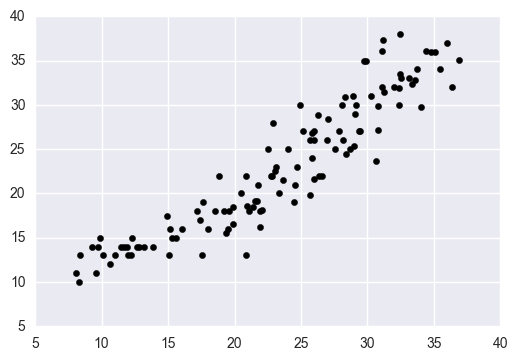

In [43]:
#Plot outputs
plt.scatter(model2.predict(test_X), test_y,  color='black')
plt.show()

In [68]:
from sklearn import ensemble
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
model3 = ensemble.GradientBoostingRegressor(**params)

model3.fit(train_X, train_y)
predictions3=model3.predict(test_X)
print(predictions3[0:5])
mse = mean_squared_error(test_y, model3.predict(test_X))
print("MSE: %.4f" % mse)

[ 13.89492828  29.64660966  26.87519901  18.05970342  14.04028618]
MSE: 7.3857


In [73]:
from sklearn.model_selection import train_test_split, cross_val_score
scores = cross_val_score(model3, train_X, train_y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.83 (+/- 0.10)


In [75]:
from sklearn import linear_model
model4 = linear_model.ElasticNetCV(alphas=[0.0001, 0.0005, 0.001, 0.01, 0.1, 1, 10], l1_ratio=[.01, .1, .5, .9, .99], max_iter=5000).fit(train_X, train_y)
model4.fit(train_X, train_y)
predictions4=model4.predict(test_X)
print(predictions4[0:5])


[ 10.61320454  29.17428952  28.66329852  20.86346422  11.87291109]


In [76]:
scores = cross_val_score(model4, train_X, train_y, cv=5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.79 (+/- 0.07)


Best accuracy is from Linear Regressor